In [ ]:
import cv2
import numpy as np
# 生成色相矩阵
m1 = np.arange(0,255,1)
m1 = m1.reshape(-1, 1)
m2 = np.multiply(m1, np.array([1,1,1]))
m3 = m2.flatten().reshape(1, -1)
m4 = np.ones([600, 1])
m5 = np.multiply(m4, m3).astype(np.uint8)
# 生成hsv矩阵
cv2.imshow("1", m5*10)
cv2.waitKey()

In [ ]:
# 函数插值拟合
import openpyxl
from openpyxl import Workbook
import os

def load_xlsx(filename='./date.xlsx'):
    datasheet = openpyxl.load_workbook(filename)
    print("加载%s成功" % filename)
    return datasheet
    
def read_sheet(datasheet, sheetnumber=0):   
    # 载入数据
    sheet = datasheet[datasheet.sheetnames[sheetnumber]]
    dic = {}
    count = 0
    for col in sheet.columns:
        # 循环处理每一行的数据
        count += 1
        if count > 3:
            break
        data = []
        for cell in col:
            if cell.value == None:
                cell.value = 0
            data.append(cell.value)
        # 更新到dic中
        dic.update({data[0]: data[1:]})
    print("载入数据中")
    return dic

datesheet = load_xlsx(r"D:\Desktop\EndNoteHere\researchHere\组会PPT\20221025-灰度&温度拟合.xlsx")
dictionary = read_sheet(datesheet, sheetnumber=5)

print(dictionary)

In [ ]:
import numpy as np
from scipy import interpolate
import pylab as pl

x=dictionary['G1']
y=dictionary['T']

xnew=np.linspace(8,3660,3653)

pl.plot(x,y,'ro')
list1=['linear','nearest', 'zero', 'slinear']
list2=[0,1,2,3,4,5,6,7,8,9]
for kind in list1:
    print(kind)
    f=interpolate.interp1d(x,y,kind=kind, bounds_error = False, fill_value="extrapolate")
    #f是一个函数，用这个函数就可以找插值点的函数值了：
    ynew=f(xnew)
    pl.plot(xnew,ynew,label=kind)

pl.legend(loc='lower right')
pl.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
dx=0.01;dy=0.01
x=np.arange(-2.0,2.0,dx)
y=np.arange(-2.0,2.0,dy)
X,Y=np.meshgrid(x,y)
def f(x,y):
    return(1-y**5+x**5)*np.exp(-x**2-y**2)
C=plt.contour(X,Y,f(X,Y),8,colors='black')  #生成等值线图
plt.contourf(X,Y,f(X,Y),8)
plt.clabel(C,inline=1,fontsize=10)

np.random

In [ ]:
N = np.random.randint(1200,1800,size=(1000,1000))
dx=0.01;dy=0.01
x=np.arange(-0.0,7.65,dx)
y=np.arange(-3.0,3.0,dy)
X,Y=np.meshgrid(x,y)
print(m5)

C=plt.contour(X,Y,m5,8,colors='black')  #生成等值线图
plt.contourf(X,Y,m5,8)
plt.colorbar()
plt.clabel(C,inline=1,fontsize=10)

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
while 1:
    plt.cla()
    plt.imshow(np.random.randint(0, 2, (2, 2)))
    plt.pause(0.1)


[[ True  True  True  True  True False  True  True  True  True]
 [ True  True  True  True False False False  True  True  True]
 [ True  True  True False False False False False  True  True]
 [ True  True  True False False False False False  True  True]
 [ True  True  True False False False False False  True  True]
 [ True  True False False False False False False False  True]
 [ True  True False False False False False False False  True]
 [ True  True False False False False False False False  True]
 [ True False False False False False False False False False]
 [ True False False False False False False False False False]]


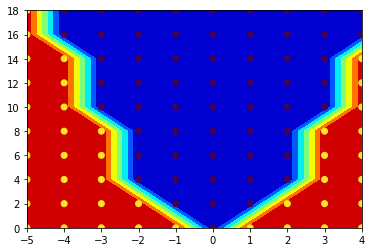

In [7]:
import numpy as np
import matplotlib.pyplot as plt
 
x = np.arange(-5,5,1)
y = np.arange(0,20,2)
xx,yy = np.meshgrid(x,y)
 
z = np.square(xx) - yy >0
print(z)
plt.contourf(xx,yy,z,cmap="jet")
plt.scatter(xx,yy,c = z)
plt.show()

In [2]:
# 读取16位图像
from skimage import io
img16 = io.imread('./2022-12-07/16-20-25-originalsrc1.tif') #已经是16位图像
print(img16.dtype)

uint16
